In [ ]:
!pip install numpy 
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install sklearn

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
%matplotlib inline

<b> Linear regression </b>

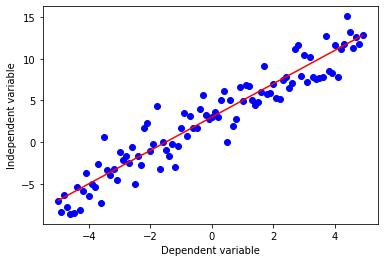

In [81]:
x=np.arange(-5.0,5.0,0.1)
y=(2*x)+3
y_noise = 2*np.random.normal(size=x.size)
ydata=y+y_noise
plt.plot(x,ydata,'bo')
plt.plot(x,y,'r')
plt.xlabel('Dependent variable')
plt.ylabel('Independent variable')
plt.show()

<h4> Non linear equations</h4>

<b> Equation= 𝑦=𝑎𝑥3+𝑏𝑥2+𝑐𝑥+𝑑  </b>

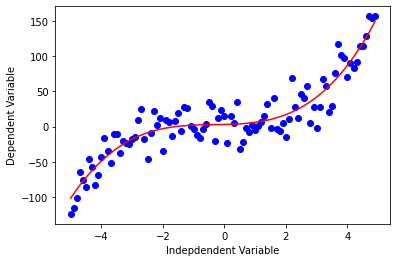

In [82]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<b> Equation  𝑌=𝑋*X (Quadric) </b>

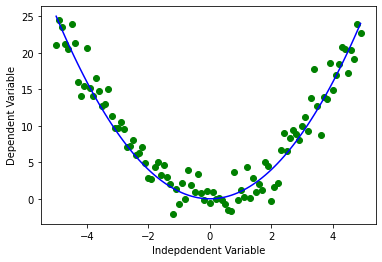

In [83]:
x = np.arange(-5.0, 5.0, 0.1)


y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'go')
plt.plot(x,y, 'b') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

<b>Exponential</b>

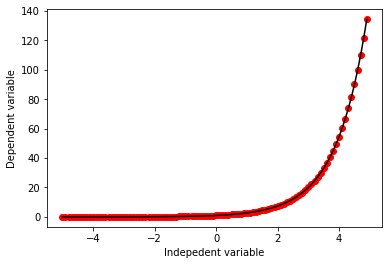

In [84]:
y=np.exp(x)
plt.plot(x,y,'ro')
plt.plot(x,y,'black')
plt.xlabel('Indepedent variable')
plt.ylabel('Dependent variable')
plt.show()

<b> Logaematric </b> <br> <b> Y=log(X)

<ipython-input-85-6472c6ba8e54>:1: RuntimeWarning: invalid value encountered in log
  y=np.log(x)


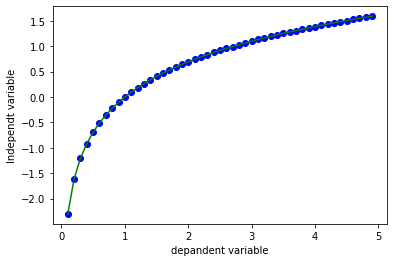

In [85]:
y=np.log(x)
plt.plot(x,y,'bo')
plt.plot(x,y,'g')
plt.xlabel('depandent variable')
plt.ylabel('Independt variable')
plt.show()

### Sigmoidal/Logistic
<br> China gdp </br>


In [86]:
#data set 
df=pd.read_csv('china_gdp.csv')
df.head()


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [87]:
x_data=df['Year'].values #independt variable
y_data=df['Value'].values #dependet variable

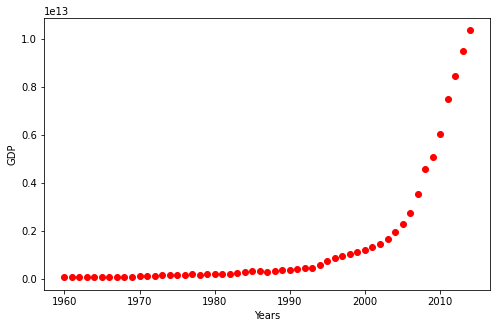

In [88]:
#Graph to find type of regression
plt.figure(figsize=(8,5))
plt.plot(x_data,y_data,'ro')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.show()

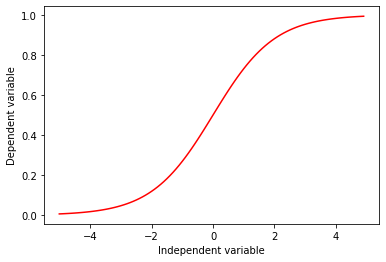

In [89]:
#chosing model
Y=1.0/(1.0+np.exp(-x))
plt.plot(x,Y,'r')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

equation = $$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$
<br> $\beta_1$: Controls the curve's steepness,
<br> $\beta_2$: Slides the curve on the x-axis.
 


In [90]:
def sigmod(x,B_1,B_2): #B_1 = beta_1 and #b_2= beta_2
    y=1/(1+np.exp(-B_1*(x-B_2)))
    return y
# function for solution of equation for model prediction     

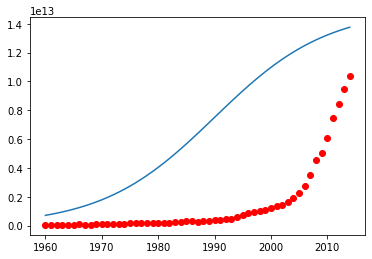

In [91]:
beta_1=0.10
beta_2=1990.0
y_predict=sigmod(x_data,beta_1,beta_2)
plt.plot(x_data,y_predict*15000000000000.)
plt.plot(x_data,y_data,'ro')

In [92]:
# data normalzation 
xdata=x_data/max(x_data)
ydata=y_data/max(y_data)


In [93]:
#curve fitting 
# now here we find beta_1 and beta_2 using scipy
popt,pcov=curve_fit(sigmod,xdata,ydata)
print(" Beta_1 = %f Beta_2= %f " % (popt[0],popt[1]))

 Beta_1 = 690.451711 Beta_2= 0.997207 


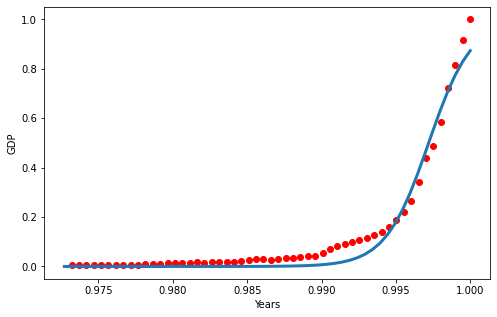

In [94]:
x=np.linspace(1960,2015,55)
x=x/max(x)
y=sigmod(x,*popt)
#print(y)
#print(x)
plt.figure(figsize=(8,5))
plt.plot(xdata,ydata,'ro',label='data')
plt.plot(x,y,linewidth=3.0,label='fit')
plt.xlabel('Years')
plt.ylabel('GDP')
plt.show()

In [95]:
# model creation and acuraccy 
# training and testing of data
msk=np.random.rand(len(df) ) < 0.8
train_x=xdata[msk]
train_y=ydata[msk]
test_x=xdata[~msk]
test_y=ydata[~msk]


In [96]:
popt,popc = curve_fit(sigmod,train_x,train_y)
# prediction 
Y_predict=sigmod(test_x,*popt)



In [101]:
#mSE MAE and r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((Y_predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(Y_predict , test_y) )


Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.98


In [99]:
print(test_y[0:5])

[0.0057156  0.00450854 0.01464318 0.01707961 0.02885665]


In [100]:
print(Y_predict[0:5])

[5.76087690e-08 1.14654148e-07 1.41805168e-05 3.98137169e-05
 4.42600553e-04]
